In [1]:
%load_ext tensorboard

from concurrent.futures import ProcessPoolExecutor, as_completed
from datetime import datetime
import pathlib
import os
import gc
from core import Model

os.environ['CUDA_​DEVICE_​ORDER'] = 'PCI_BUS_ID'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
clock_start = datetime.now().strftime("%Y%m%d-%H%M%S")
#clock_start = "20240715-214900"
workdir = str(pathlib.Path().resolve())

models =  [
    (0,0, clock_start, workdir),
    (0,1,clock_start, workdir),
    (0,2,clock_start, workdir),
    (0,3,clock_start, workdir),
    (1,0,clock_start, workdir),
    (1,1,clock_start, workdir),
    (1,2,clock_start, workdir),
    (1,3,clock_start, workdir)
    ]


2024-07-21 17:37:25.122654: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 17:37:25.769998: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

def frontload_data():
    from tensorflow import keras
    mnist_dataset = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()
    mnist_dataset = keras.datasets.mnist
    (train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

def pool_job(input):
    this_model = Model(*input)
    this_model.set_data()
    this_model.prep()
    this_model.pre_filter()
    this_model.fit()
    this_model.save_filtered()

frontload_data()
#to prevent race condition
with ProcessPoolExecutor(8) as executor:
    runner = {
            executor.submit(pool_job, m): m for m in models
        }
    for future in as_completed(runner):
        runner.pop(future)





2024-07-21 17:37:27.901312: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:37:27.901398: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:37:27.901791: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:37:27.901856: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:37:27.901959: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:37:27.902123: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:37:27.902499: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:37:27.902671: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:37:27.902948: I external/local

 50/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

I0000 00:00:1721583449.101435   29023 service.cc:145] XLA service 0x7e32c8002700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721583449.101485   29023 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
I0000 00:00:1721583449.118961   29032 service.cc:145] XLA service 0x7e32e00140a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721583449.119005   29032 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2024-07-21 17:37:29.151278: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-07-21 17:37:29.158180: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1721583449.242268   29032 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
I0000 00:0

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/30


I0000 00:00:1721583450.696667   29005 service.cc:145] XLA service 0x7e32dc013e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721583450.696715   29005 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
I0000 00:00:1721583450.722712   29066 service.cc:145] XLA service 0x7e32dc0140b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721583450.722757   29066 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2024-07-21 17:37:30.754982: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1721583450.777559   28976 service.cc:145] XLA service 0x7e32d4013e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721583450.777607   28976 service.

Epoch 1/30


2024-07-21 17:37:30.912448: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-07-21 17:37:30.913916: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-07-21 17:37:30.915630: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-07-21 17:37:31.025675: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:37:31.025720: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
I0000 00:00:1721583451.196640   28981 service.cc:145] XLA service 0x7e32fc013ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721583451.196685   28981 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
I0000 00:00:1721583451.230468   29048 service.cc:145] XLA service 0x7e32e4002350 initialized for platform CUDA

  1/118 ━━━━━━━━━━━━━━━━━━━━ 8:46 5s/stepp

I0000 00:00:1721583453.217198   29066 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
I0000 00:00:1721583453.276124   28976 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
I0000 00:00:1721583453.333869   29005 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  5/118 ━━━━━━━━━━━━━━━━━━━━ 22s 197ms/step

I0000 00:00:1721583453.828900   28959 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
I0000 00:00:1721583453.875210   28981 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
I0000 00:00:1721583453.878891   29048 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 22/118 ━━━━━━━━━━━━━━━━━━━━ 38s 397ms/step118/118 - 11s - 90ms/step - accuracy: 0.7104 - loss: 0.8526 - val_accuracy: 0.7826 - val_loss: 0.6157
Epoch 2/30
 23/118 ━━━━━━━━━━━━━━━━━━━━ 37s 398ms/step118/118 - 11s - 95ms/step - accuracy: 0.7059 - loss: 1.0023 - val_accuracy: 0.8657 - val_loss: 0.4992
Epoch 2/30
 49/118 ━━━━━━━━━━━━━━━━━━━━ 30s 440ms/step118/118 - 13s - 113ms/step - accuracy: 0.8103 - loss: 0.5488 - val_accuracy: 0.8080 - val_loss: 0.5451
Epoch 3/30
 50/118 ━━━━━━━━━━━━━━━━━━━━ 29s 440ms/step118/118 - 13s - 113ms/step - accuracy: 0.8747 - loss: 0.4582 - val_accuracy: 0.8926 - val_loss: 0.3882
Epoch 3/30
 82/118 ━━━━━━━━━━━━━━━━━━━━ 15s 433ms/step118/118 - 13s - 114ms/step - accuracy: 0.8284 - loss: 0.4988 - val_accuracy: 0.8191 - val_loss: 0.5146
Epoch 4/30
 84/118 ━━━━━━━━━━━━━━━━━━━━ 14s 429ms/step118/118 - 13s - 114ms/step - accuracy: 0.8902 - loss: 0.3876 - val_accuracy: 0.9005 - val_loss: 0.3481
Epoch 4/30
 90/118 ━━━━━━━━━━━━━━━━━━━━ 15s 544ms/step118/118 - 13s - 1

2024-07-21 17:38:38.227886: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:38:38.227931: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


 6/20 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step

2024-07-21 17:38:38.434257: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:38:38.434306: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


15/20 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/stepEpoch 1/30
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step

2024-07-21 17:38:38.761562: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:38:38.761610: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/stepEpoch 1/30
11/20 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step

2024-07-21 17:38:39.611352: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:38:39.611405: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step

2024-07-21 17:38:40.328722: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-07-21 17:38:40.334526: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed
2024-07-21 17:38:40.345609: I external/local_xla/xla/backends/profiler/gpu/cupti_collector.cc:540]  GpuTracer has collected 2045 callback api events and 1705 activity events. 
2024-07-21 17:38:40.358946: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:38:40.360056: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: /workspaces/QML-QPF/multiprocessing/output/20240721-173727/runs/FASHIONMNIST/FASHIONMNISTqcnot/plugins/profile/2024_07_21_17_38_40/1ba22281c77a.xplane.pb
2024-07-21 17:38:40.478352: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-07-21 17:38:40.484223: I external/local_xla/

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

2024-07-21 17:38:40.821245: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-07-21 17:38:40.827921: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed
2024-07-21 17:38:40.838715: I external/local_xla/xla/backends/profiler/gpu/cupti_collector.cc:540]  GpuTracer has collected 2045 callback api events and 1705 activity events. 
2024-07-21 17:38:40.856178: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:38:40.857307: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: /workspaces/QML-QPF/multiprocessing/output/20240721-173727/runs/MNIST/MNISTqcnot/plugins/profile/2024_07_21_17_38_40/1ba22281c77a.xplane.pb


118/118 - 3s - 28ms/step - accuracy: 0.8512 - loss: 0.4314 - val_accuracy: 0.8381 - val_loss: 0.4674
Epoch 9/30
118/118 - 3s - 27ms/step - accuracy: 0.9129 - loss: 0.3082 - val_accuracy: 0.9149 - val_loss: 0.2953
Epoch 9/30


2024-07-21 17:38:41.294964: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-07-21 17:38:41.301646: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed
2024-07-21 17:38:41.313469: I external/local_xla/xla/backends/profiler/gpu/cupti_collector.cc:540]  GpuTracer has collected 2045 callback api events and 1705 activity events. 
2024-07-21 17:38:41.329786: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:38:41.330749: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: /workspaces/QML-QPF/multiprocessing/output/20240721-173727/runs/FASHIONMNIST/FASHIONMNISTqentcnot/plugins/profile/2024_07_21_17_38_41/1ba22281c77a.xplane.pb


118/118 - 1s - 8ms/step - accuracy: 0.8533 - loss: 0.4260 - val_accuracy: 0.8386 - val_loss: 0.4637
Epoch 10/30
118/118 - 1s - 8ms/step - accuracy: 0.9142 - loss: 0.3026 - val_accuracy: 0.9163 - val_loss: 0.2918
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step
118/118 - 5s - 40ms/step - accuracy: 0.6923 - loss: 0.8977 - val_accuracy: 0.7822 - val_loss: 0.6294
Epoch 2/30
118/118 - 5s - 38ms/step - accuracy: 0.6680 - loss: 1.1393 - val_accuracy: 0.8541 - val_loss: 0.5804
Epoch 2/30
118/118 - 4s - 36ms/step - accuracy: 0.7006 - loss: 1.0385 - val_accuracy: 0.8706 - val_loss: 0.5027
Epoch 2/30
118/118 - 1s - 7ms/step - accuracy: 0.8549 - loss: 0.4215 - val_accuracy: 0.8388 - val_loss: 0.4607
Epoch 11/30
118/118 - 1s - 8ms/step - accuracy: 0.9157 - loss: 0.2981 - val_accuracy: 0.9171 - val_loss: 0.2890
Epoch 11/30
118/118 - 4s - 31ms/step - accuracy: 0.6976 - loss: 0.9040 - val_accuracy: 0.7853 - val_loss: 0.6207
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step
Epoch 1/30
118/118 - 1

2024-07-21 17:38:43.664177: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:38:43.664222: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


118/118 - 1s - 7ms/step - accuracy: 0.8561 - loss: 0.4176 - val_accuracy: 0.8391 - val_loss: 0.4582
Epoch 12/30
118/118 - 1s - 7ms/step - accuracy: 0.9169 - loss: 0.2944 - val_accuracy: 0.9168 - val_loss: 0.2867
Epoch 12/30
118/118 - 1s - 7ms/step - accuracy: 0.8104 - loss: 0.5493 - val_accuracy: 0.8117 - val_loss: 0.5402
Epoch 3/30
Epoch 1/30
118/118 - 1s - 7ms/step - accuracy: 0.8226 - loss: 0.5075 - val_accuracy: 0.8181 - val_loss: 0.5197
Epoch 4/30


2024-07-21 17:38:44.508356: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:38:44.508547: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


118/118 - 1s - 7ms/step - accuracy: 0.8569 - loss: 0.4142 - val_accuracy: 0.8400 - val_loss: 0.4561
Epoch 13/30
118/118 - 1s - 7ms/step - accuracy: 0.9178 - loss: 0.2912 - val_accuracy: 0.9169 - val_loss: 0.2849
Epoch 13/30
118/118 - 2s - 17ms/step - accuracy: 0.8659 - loss: 0.5040 - val_accuracy: 0.8927 - val_loss: 0.4071
Epoch 3/30
118/118 - 1s - 7ms/step - accuracy: 0.8278 - loss: 0.4933 - val_accuracy: 0.8228 - val_loss: 0.5060
Epoch 4/30


2024-07-21 17:38:44.814769: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-07-21 17:38:44.823545: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed
2024-07-21 17:38:44.837149: I external/local_xla/xla/backends/profiler/gpu/cupti_collector.cc:540]  GpuTracer has collected 2045 callback api events and 1705 activity events. 
2024-07-21 17:38:44.851856: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:38:44.853344: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: /workspaces/QML-QPF/multiprocessing/output/20240721-173727/runs/MNIST/MNISTqrand/plugins/profile/2024_07_21_17_38_44/1ba22281c77a.xplane.pb


118/118 - 1s - 11ms/step - accuracy: 0.9057 - loss: 0.3478 - val_accuracy: 0.9211 - val_loss: 0.2987
Epoch 4/30
118/118 - 1s - 7ms/step - accuracy: 0.8579 - loss: 0.4113 - val_accuracy: 0.8404 - val_loss: 0.4543
Epoch 14/30
118/118 - 1s - 7ms/step - accuracy: 0.9188 - loss: 0.2884 - val_accuracy: 0.9175 - val_loss: 0.2833
Epoch 14/30
118/118 - 1s - 8ms/step - accuracy: 0.8916 - loss: 0.3958 - val_accuracy: 0.9059 - val_loss: 0.3430
Epoch 4/30
118/118 - 1s - 8ms/step - accuracy: 0.8362 - loss: 0.4645 - val_accuracy: 0.8284 - val_loss: 0.4863


2024-07-21 17:38:45.703225: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-07-21 17:38:45.712435: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed
2024-07-21 17:38:45.724523: I external/local_xla/xla/backends/profiler/gpu/cupti_collector.cc:540]  GpuTracer has collected 2045 callback api events and 1705 activity events. 
2024-07-21 17:38:45.739335: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:38:45.740819: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: /workspaces/QML-QPF/multiprocessing/output/20240721-173727/runs/FASHIONMNIST/FASHIONMNISTqrand/plugins/profile/2024_07_21_17_38_45/1ba22281c77a.xplane.pb


Epoch 5/30
118/118 - 1s - 12ms/step - accuracy: 0.8321 - loss: 0.4793 - val_accuracy: 0.8235 - val_loss: 0.5014
Epoch 5/30
118/118 - 1s - 8ms/step - accuracy: 0.9179 - loss: 0.3009 - val_accuracy: 0.9290 - val_loss: 0.2670
Epoch 5/30
118/118 - 1s - 8ms/step - accuracy: 0.8587 - loss: 0.4086 - val_accuracy: 0.8406 - val_loss: 0.4528
Epoch 15/30
118/118 - 1s - 7ms/step - accuracy: 0.9197 - loss: 0.2859 - val_accuracy: 0.9173 - val_loss: 0.2820
Epoch 15/30
118/118 - 1s - 8ms/step - accuracy: 0.9039 - loss: 0.3449 - val_accuracy: 0.9144 - val_loss: 0.3086
Epoch 5/30
118/118 - 1s - 8ms/step - accuracy: 0.8433 - loss: 0.4459 - val_accuracy: 0.8328 - val_loss: 0.4732
Epoch 6/30
118/118 - 1s - 8ms/step - accuracy: 0.8392 - loss: 0.4612 - val_accuracy: 0.8268 - val_loss: 0.4894
Epoch 6/30
118/118 - 1s - 8ms/step - accuracy: 0.9252 - loss: 0.2717 - val_accuracy: 0.9331 - val_loss: 0.2464
Epoch 6/30
118/118 - 3s - 28ms/step - accuracy: 0.6988 - loss: 1.0737 - val_accuracy: 0.8637 - val_loss: 0.54

In [3]:
def pool_job2(detail):
    restored_model = Model(*detail)
    restored_model.set_data()
    restored_model.prep()
    restored_model.load_history()
    restored_model.visuals.weights()
    restored_model.visuals.relative_weights()
    restored_model.visuals.bias()
    restored_model.visuals.relative_bias()
    restored_model.visuals.data_samples()
    restored_model.visuals.relative_samples()
    restored_model.visuals.filtering()


with ProcessPoolExecutor(8) as executor:
    runner = {
            executor.submit(pool_job2, m): m for m in models
        }
    for future in as_completed(runner):
        runner.pop(future) 

2024-07-21 17:39:14.112477: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:39:14.112551: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:39:14.113619: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:39:14.113767: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:39:14.114101: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:39:14.114291: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:39:14.114291: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:39:14.114494: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:39:14.114768: I external/local

  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:29 288ms/step

I0000 00:00:1721583554.887760   41434 service.cc:145] XLA service 0x7e32d80143a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721583554.887812   41434 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2024-07-21 17:39:14.896865: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-21 17:39:14.934566: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1721583554.995783   41461 service.cc:145] XLA service 0x7e32d8014cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721583554.995819   41461 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2024-07-21 17:39:15.004274: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] dis

 52/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

2024-07-21 17:39:15.098407: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1721583555.127275   41576 service.cc:145] XLA service 0x7e32cc014f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721583555.127323   41576 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2024-07-21 17:39:15.136381: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-21 17:39:15.145924: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1721583555.165992   41547 service.cc:145] XLA service 0x7e32d8014190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721583555.166028   41547 servic

239/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

2024-07-21 17:39:15.309012: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1721583555.355103   41576 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
I0000 00:00:1721583555.396938   41547 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
I0000 00:00:1721583555.424370   41561 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
I0000 00:00:1721583555.477462   41624 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
I0000 00:00:1721583555.493006   41602 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam'

/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/weights/MNISTMNISTqrand.gif


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/weights/MNISTMNISTqentcnot.gif


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/weights/FASHIONMNISTFASHIONMNISTno_filter.gif
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/weights/MNISTMNISTno_filter.gif
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/weights/FASHIONMNISTFASHIONMNISTqrand.gif
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/weights/FASHIONMNISTFASHIONMNISTqentcnot.gif
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/weights/FASHIONMNISTFASHIONMNISTqcnot.gif
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/weights/MNISTMNISTqcnot.gif
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/relative_weights/FASHIONMNISTFASHIONMNISTno_filter.gif
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/relative_weights/MNISTMNISTno_filter.gif
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/relative_weights/MNISTMNISTqentcnot.gif
/workspaces/QML-QPF/multip

2024-07-21 17:46:11.430301: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:46:11.430386: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:46:11.457963: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1239] Profiler found 1 GPUs
2024-07-21 17:46:11.464772: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:46:11.464898: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed
2024-07-21 17:46:11.801128: I tensorflow/core/common_runtime/gpu/gpu_process_state.cc:238] Using CUDA malloc Async allocator for GPU: 0
2024-07-21 17:46:11.801419: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6795 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:b3:00.0, compute capability: 7.

  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:27 280ms/step

I0000 00:00:1721583972.093274   45069 service.cc:145] XLA service 0x7e3298014bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721583972.093353   45069 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2024-07-21 17:46:12.108030: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-21 17:46:12.142654: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1721583972.280169   45069 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested fo

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/UMAP/MNISTMNISTno_filter.png


2024-07-21 17:46:37.153146: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:46:37.153180: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:46:37.175091: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:46:37.175598: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/UMAP/MNISTMNISTqrand.png


2024-07-21 17:46:56.295883: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:46:56.295917: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:46:56.318154: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:46:56.319069: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/UMAP/MNISTMNISTqcnot.png


2024-07-21 17:47:15.530934: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:47:15.530971: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:47:15.552043: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:47:15.553616: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/UMAP/MNISTMNISTqentcnot.png


2024-07-21 17:47:34.518245: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:47:34.518278: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:47:34.538849: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:47:34.540356: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/UMAP/FASHIONMNISTFASHIONMNISTno_filter.png


2024-07-21 17:47:52.268280: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:47:52.268316: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:47:52.289232: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:47:52.291242: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/UMAP/FASHIONMNISTFASHIONMNISTqrand.png


2024-07-21 17:48:10.202043: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:48:10.202076: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:48:10.223624: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:48:10.225805: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/UMAP/FASHIONMNISTFASHIONMNISTqcnot.png


2024-07-21 17:48:28.474910: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-07-21 17:48:28.474944: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-07-21 17:48:28.495767: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-07-21 17:48:28.498090: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1364] CUPTI activity buffer flushed


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/conda/envs/QML-QPF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step
/workspaces/QML-QPF/multiprocessing/output/20240721-173727/visuals/UMAP/FASHIONMNISTFASHIONMNISTqentcnot.png


{None: (1, 3, '20240721-173727', '/workspaces/QML-QPF/multiprocessing')}

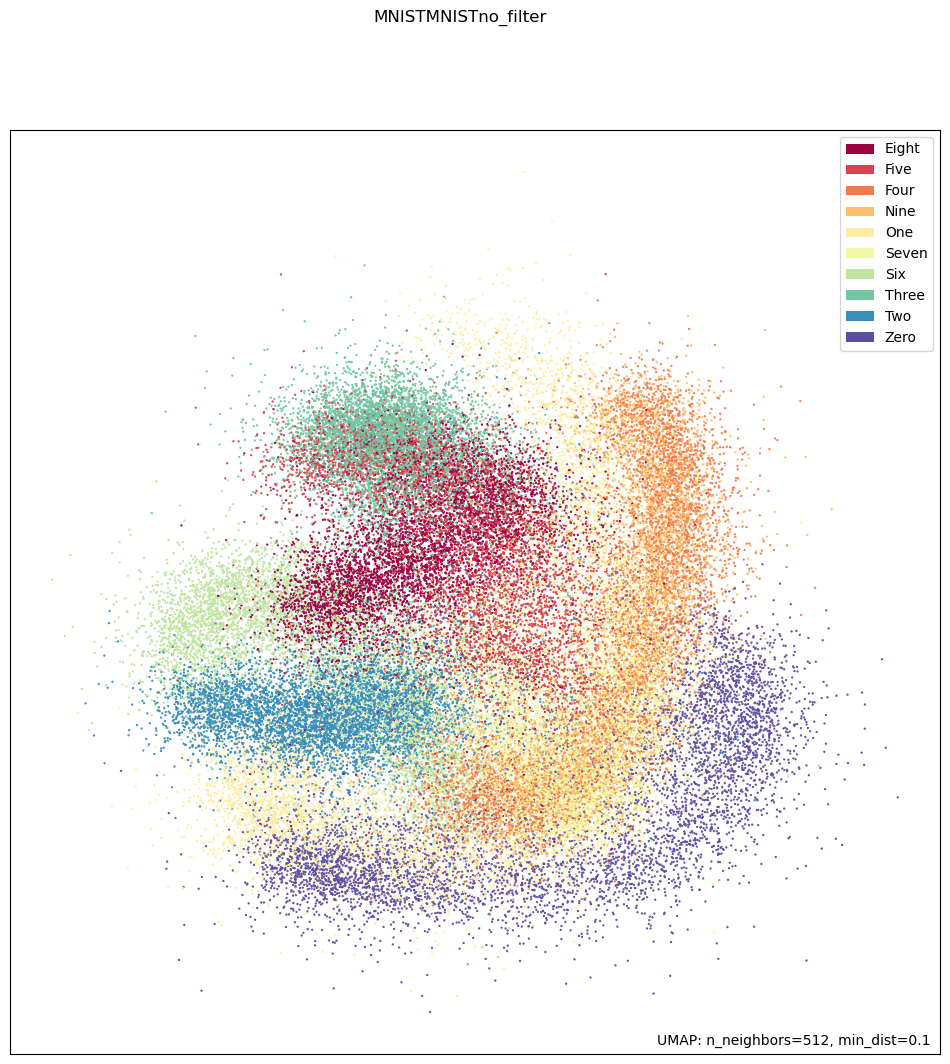

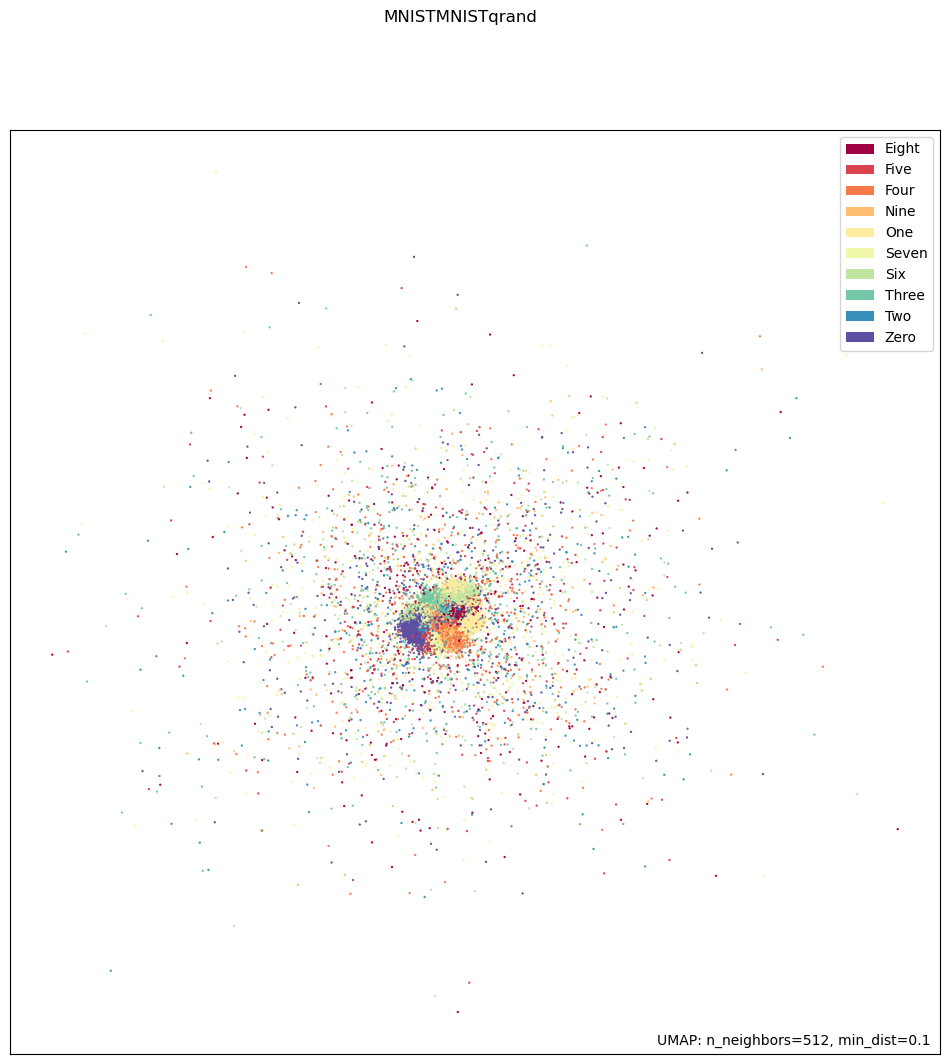

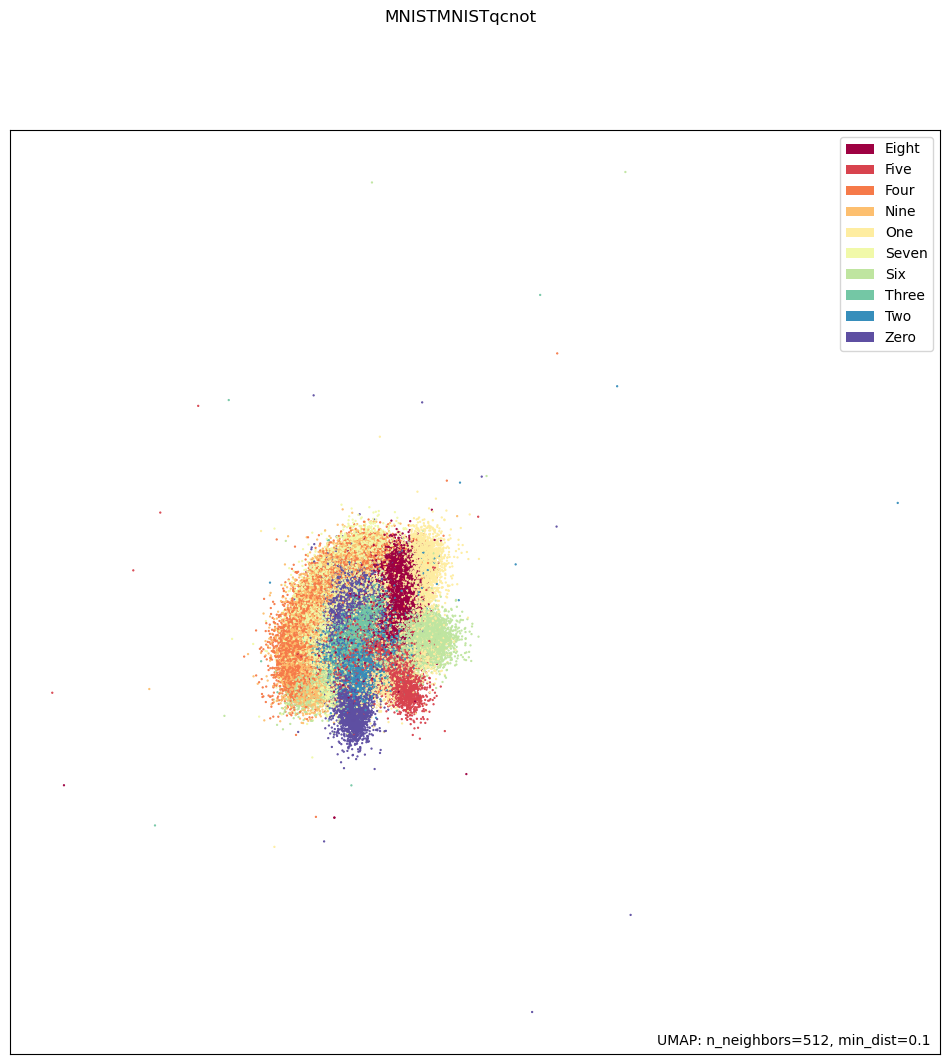

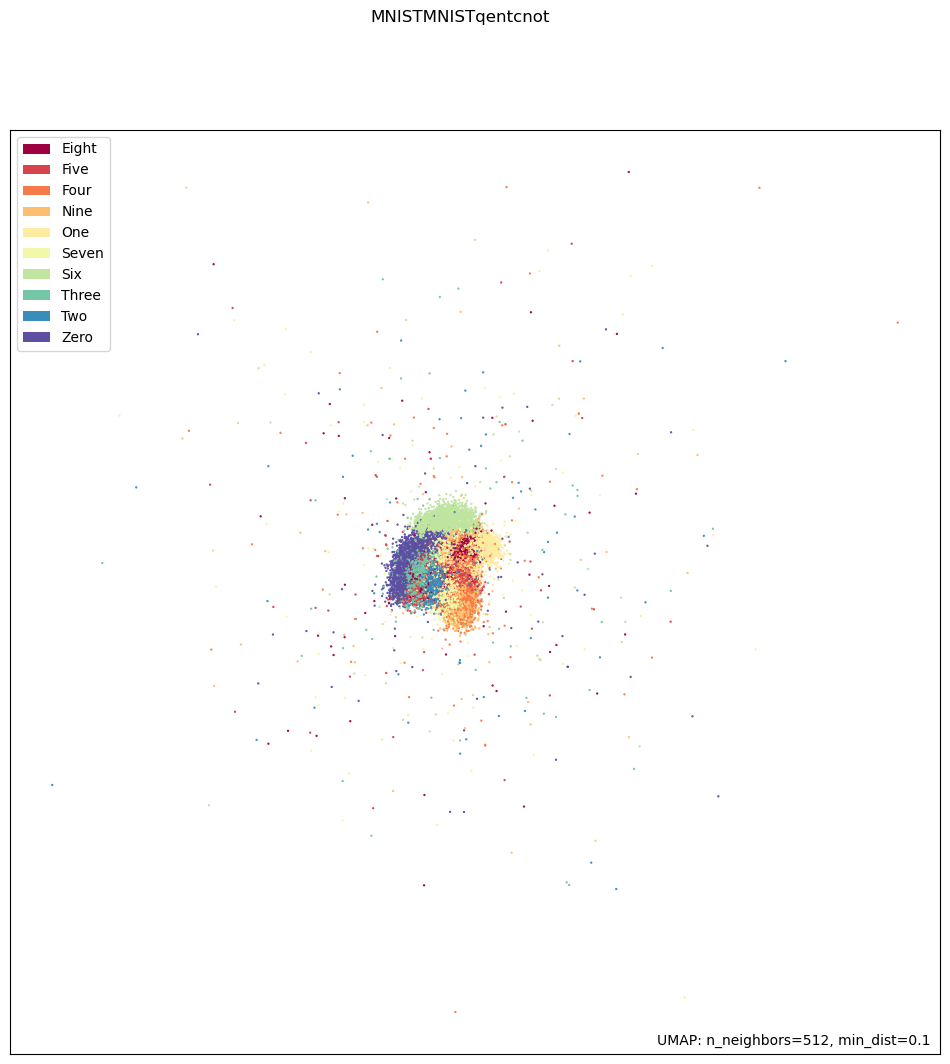

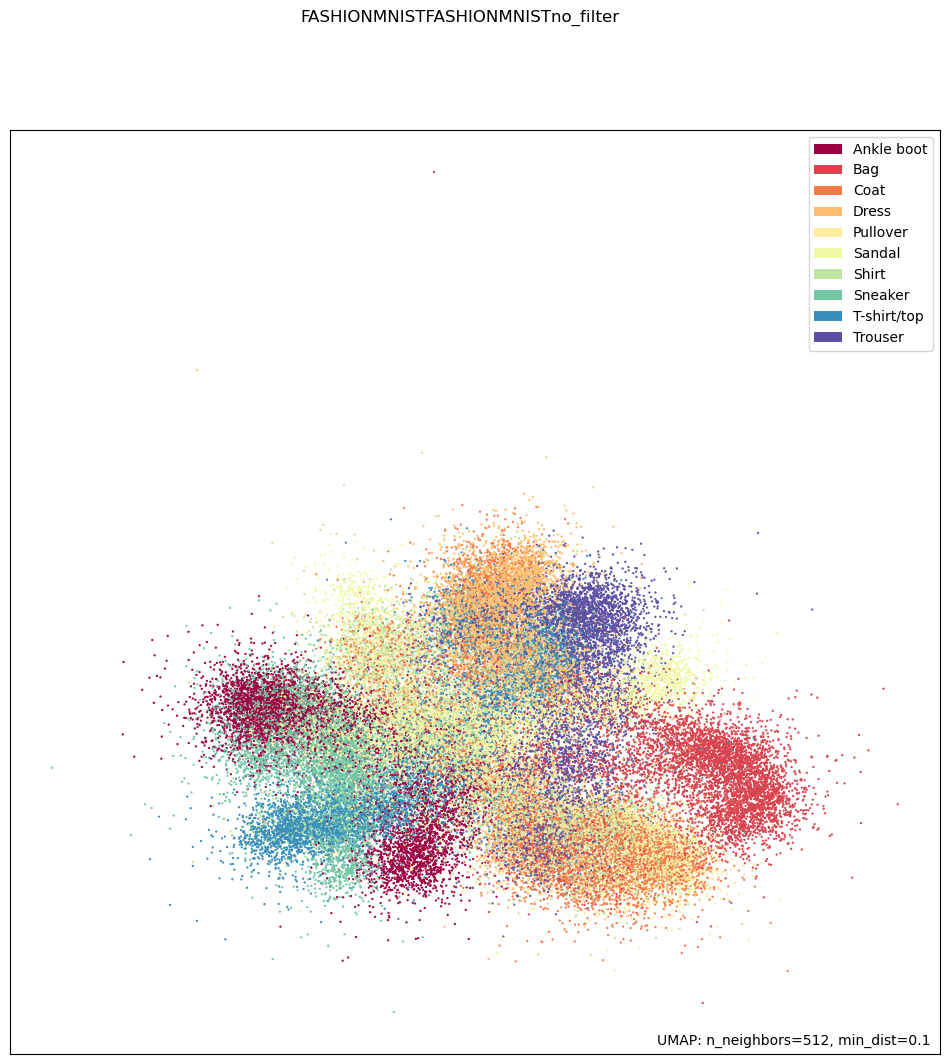

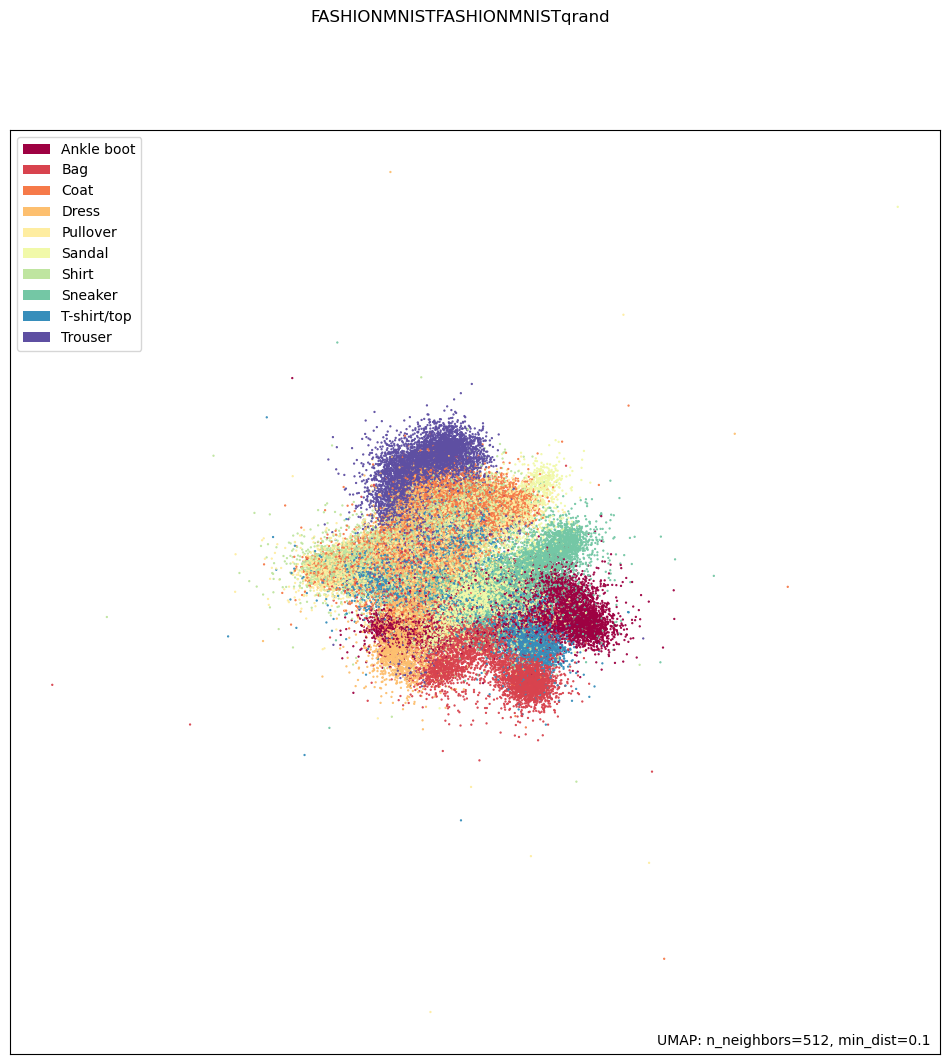

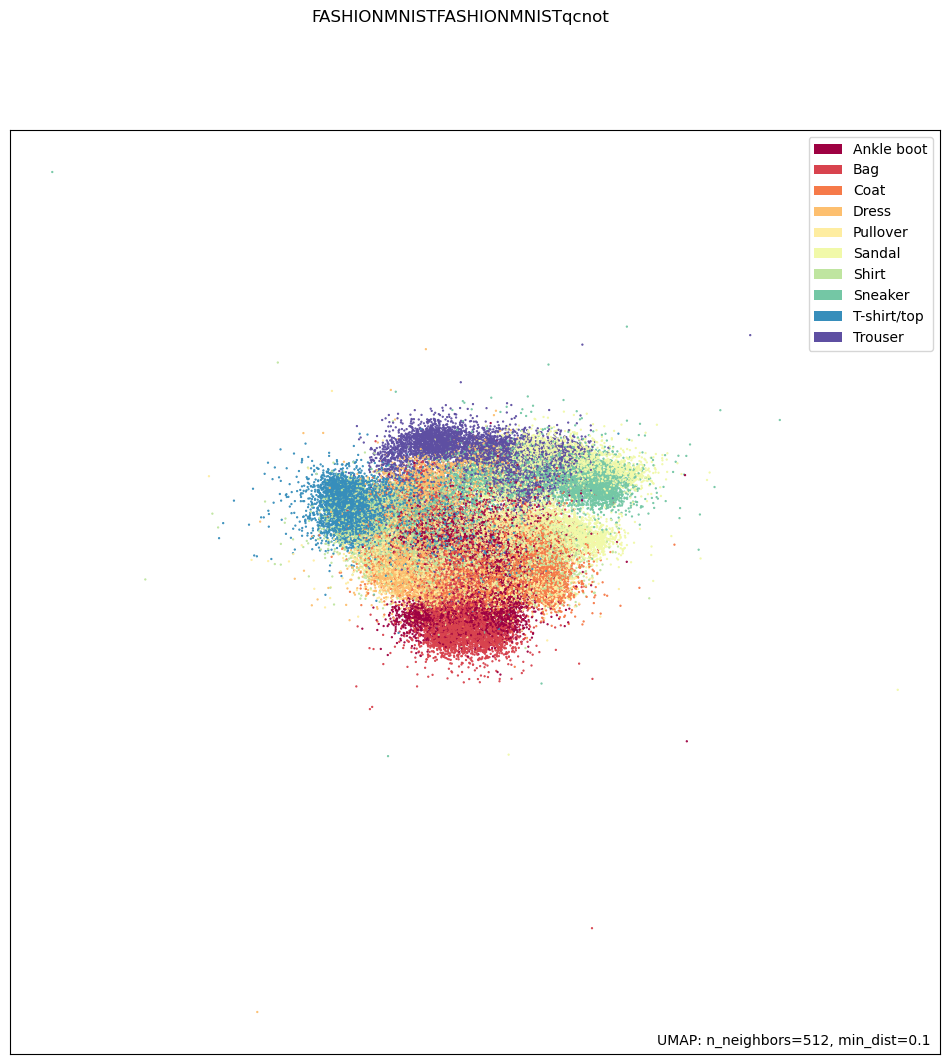

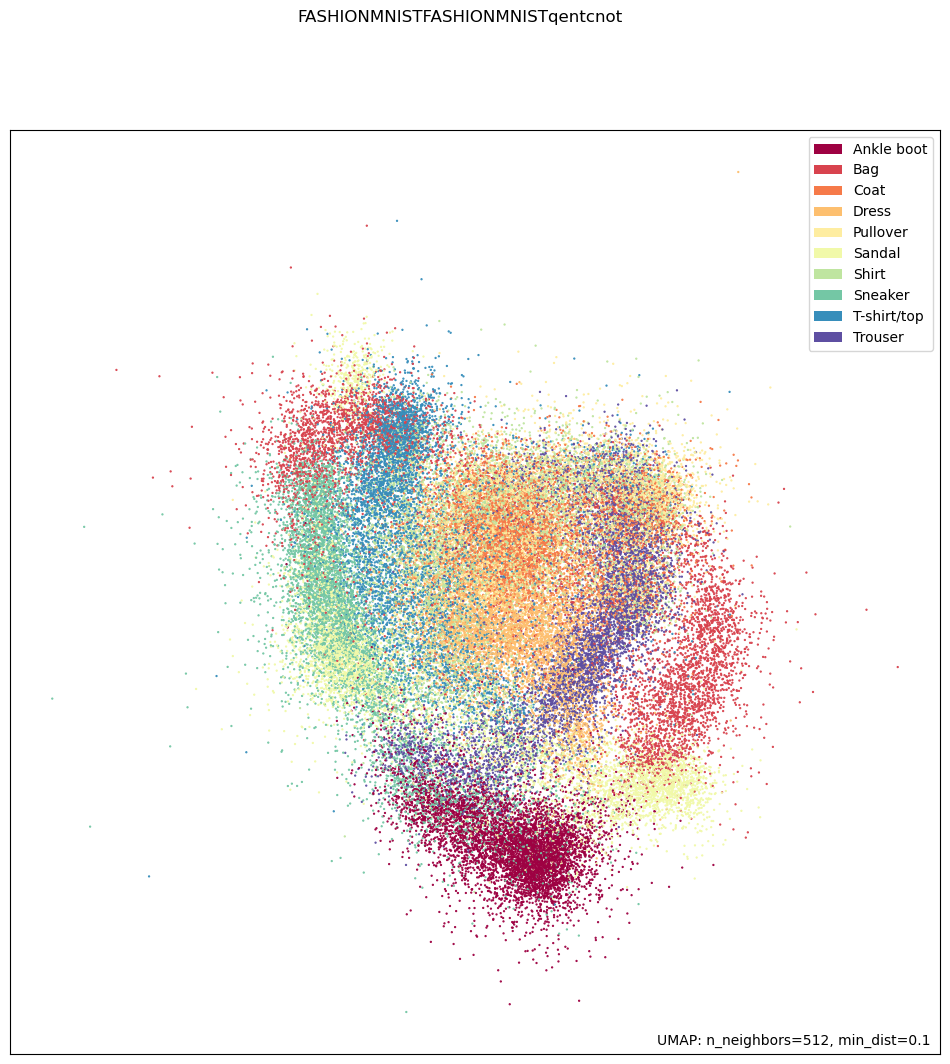

In [4]:
def UMAP_job(detail):
    restored_model = Model(*detail)
    restored_model.set_data()
    restored_model.prep()
    restored_model.load_history()
    restored_model.visuals.manifold_umap()

{UMAP_job(m): m for m in models}  